# Modelo de Predição Cancer de Mama 

##  1 Analise do dados

In [1]:
import pandas as pd
import numpy as np
import sklearn as nk

In [2]:
df = pd.read_csv('data/data.csv')#Lendos dados

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [5]:
df.shape

(569, 33)

In [6]:
count = df['diagnosis'].value_counts()#Contando as ocorrencias das classes da variavél resposta

In [7]:
percent= df['diagnosis'].value_counts(normalize=True)*100

In [8]:
table = pd.concat([count, percent],axis=1)

In [9]:
table.columns = ['#target', '%target']

In [10]:
table

,#target,%target
B,357,62.741652
M,212,37.258348


### Verificando Valores nulos

In [11]:
df.isnull().sum() #A coluna Unamed: 32 será desconsiderada para as análises

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

#### Correlações dos dados

In [12]:
df_corr  = df.corr()

In [13]:
df_corr.head(5)# Muitas variaveis com correlação alta

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,1.000000,0.074626,0.099770,0.073159,0.096893,-0.012968,0.000096,0.050080,0.044158,-0.022114,...,0.064720,0.079986,0.107187,0.010338,-0.002968,0.023203,0.035174,-0.044224,-0.029866,NaN
radius_mean,0.074626,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,NaN
texture_mean,0.099770,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,NaN
perimeter_mean,0.073159,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,NaN
area_mean,0.096893,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,NaN


## Visualização

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

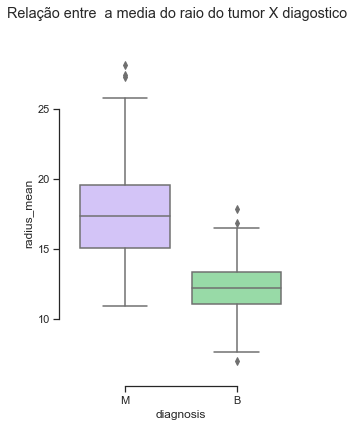

In [21]:
sns.set(style = 'ticks', palette='pastel')
plt.figure(figsize=(4,6)).suptitle('Relação entre  a media do raio do tumor X diagostico')

sns.boxplot(x = 'diagnosis', y='radius_mean',
            palette=['m','g'],
            data=df)
sns.despine(offset=10, trim=True)

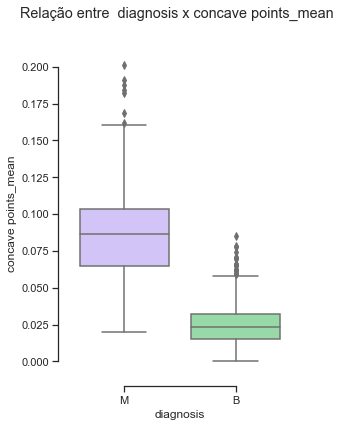

In [22]:
'''sns.set(style = 'ticks', palette='pastel')

sns.catplot(x = 'diagnosis', y='concave points_mean',
            palette=['m','g'],
            data=df,
           height=6,
           kind='bar')'''

sns.set(style = 'ticks', palette='pastel')
plt.figure(figsize=(4,6)).suptitle('Relação entre  diagnosis x concave points_mean')

sns.boxplot(x = 'diagnosis', y='concave points_mean',
            palette=['m','g'],
            data=df)
sns.despine(offset=10, trim=True)

#### Selecionando Variáveis

In [28]:
var_resp

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [23]:
var_resp = df['diagnosis'] # pegando a var resposta

In [24]:
df.drop(['id','Unnamed: 32','diagnosis'],axis= 1, inplace =True) #Dropando a Unnamed: 32, id e a var resposta  

In [33]:
df_filtro = df

In [ ]:
df_filtro.dtypes ## todas variaveis categoricas já estão numéricas

#### Separar Treino e Teste

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_all = df_filtro
y_all = var_resp

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.20, random_state = 5234)

In [37]:
print('Numero de observações do treino:', len(X_train))
print('Numero de observações do teste:', len(X_test))

Numero de observações do treino: 455
Numero de observações do teste: 114


### Modelagem e Validação

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [39]:
clf = DecisionTreeClassifier(random_state = 123, max_depth=3, min_samples_leaf=50)

In [40]:
modelo = clf.fit(X_train, y_train)#Aqui eu acho que está treinando o modelo.

#### Validação cruzada com 5 folds e verificar a acurácia para cada fold

In [41]:
scores = cross_val_score(clf, X_train, y_train, cv = 5)
scores

array([0.94505495, 0.95604396, 0.91208791, 0.89010989, 0.92307692])

In [43]:
print(f'Accuracy {scores.mean() :.2f} (+/- {scores.std() * 2 :.2f})')

Accuracy 0.93 (+/- 0.05)


In [44]:
importancia = clf.feature_importances_

In [45]:
importancia = pd.DataFrame(importancia)#Transformando em DataFrame
#importancia.head(2)

In [50]:
colunas = X_train.columns
colunas = pd.DataFrame(colunas)#Trandormando as colunas do base de treino em dataframe

var_importancia = pd.concat([colunas, importancia],axis=1)# Concatenando os dois dataframes

In [52]:
var_importancia.columns = ['coluna', 'importancia']#Renomeando as colunas

In [53]:
var_importancia.sort_values(by=['importancia'],axis=0, ascending=False, inplace=True)#Ordenando por importancia


In [55]:
var_importancia.head()

,coluna,importancia
7,concave points_mean,0.920012
22,perimeter_worst,0.061592
23,area_worst,0.017792
18,symmetry_se,0.000604
0,radius_mean,0.000000


# Predizendo Base de Teste e Calculando acc

In [59]:
y_predito = modelo.predict_proba(X_test)#Prevendo na base de teste

In [57]:
#modelo.predict_proba(X_test)

In [60]:
y_predito = modelo.predict(X_test)
y_predito

array(['B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B'], dtype=object)

In [61]:
acc_test = accuracy_score(y_test, y_predito)
acc_test

0.8508771929824561